In [1]:
import set_jupyter_env
from apiServer import *

In [2]:
API = ApiServer()

In [3]:
API.list_datasets()

0. Nerlnet/skab: ['skab_full.csv']
1. Nerlnet/MNist: []
2. Nerlnet/synthetic_norm: ['synthetic_full.csv']


In [4]:
API.download_dataset(2)

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

[INFO][2024-06-23 23:10:35,346] Files downloaded to /tmp/nerlnet/data/NerlnetData-master/nerlnet/synthetic_norm


In [5]:
dc = 2
conn = 19
exp = 1
API.setJsons(dc, conn, exp)

In [6]:
dc_path, conn_path, exp_path = API.getUserJsons()
dc_path

'/usr/local/lib/nerlnet-lib/NErlNet/inputJsonsFiles/DistributedConfig/dc_fed_dist_14d.json'

In [7]:
exp_name = "14Devices"
API.initialization(exp_name, dc_path, conn_path, exp_path)

[INFO][2024-06-23 23:10:38,353] 
Network components:
                 Receiver's Address: http://10.0.0.5:8901
                 Frequency: 100 [batches/sec]
                 Batchsize: 50 [samples]
                 devicesIp: ['10.0.0.5', '10.0.0.31', '10.0.0.17', '10.0.0.18', '10.0.0.19', '10.0.0.20', '10.0.0.21', '10.0.0.22', '10.0.0.23', '10.0.0.24', '10.0.0.25', '10.0.0.26', '10.0.0.27', '10.0.0.28', '10.0.0.29']
                 mainServerIp: 10.0.0.5
                 mainServerPort: 8900
                 apiServerIp: 10.0.0.5
                 apiServerPort: 8901
                 Clients: ['c1', 'c2', 'c3', 'c4', 'c5']
                 Workers: ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9']
                 Sources: ['s1', 's2', 's3', 's4', 's5']
                 Routers: ['r1', 'r2', 'r3', 'r4']
[INFO][2024-06-23 23:10:38,354] Connections:
[INFO][2024-06-23 23:10:38,355] 		 r1 : ['mainServer', 'r2', 's1', 'c3', 'c2']
[INFO][2024-06-23 23:10:38,358] 		 r2 : ['r3', 's2', 's

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-06-23 23:10:40,423] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***


In [8]:
%pip install networkx pygraphviz
import networkx as nx
def visualize_nerlnet_graph(api_server_inst,  connections : dict , components): # connections is a dictionary with keys as routers and values as lists of their neighbors
    print("Connections: " , list(connections.items()))
    routers = list(connections.keys())
    print("Routers: " , routers)
    workers = list(components.map_worker_to_client.keys())
    print("Workers: " , workers)
    graph = nx.Graph()
    nodes = routers + components.sources + components.clients + workers + [API_SERVER_STR , MAIN_SERVER_STR]
    edges = [] # list of tuples
    for router , neighbors in list(connections.items()):
        for neighbor in neighbors:
            if (router,neighbor) not in edges:
                print(f"Adding edge ({router} , {neighbor}) to graph")
                edges.append((router , neighbor))
    edges.append((API_SERVER_STR , MAIN_SERVER_STR)) # Always connected
    for worker in workers:
        edges.append((worker , components.map_worker_to_client[worker]))
    graph.add_nodes_from(nodes)
    graph.add_edges_from(edges)
    
    my_labels = {'mainServer': 'mS' , 'apiServer': 'aS'}
    nx.relabel_nodes(graph, my_labels , copy=False)
    
    default_colors = {node:'#A90433' for node in graph.nodes()}
    node_colors = {node:default_colors[node] for node in graph.nodes()}
    nx.set_node_attributes(graph, node_colors, 'color')
    colors = nx.get_node_attributes(graph, 'color').values()

    pos = nx.nx_agraph.graphviz_layout(graph)
    angle = 100
    
    plt.figure(figsize=(8,6),dpi=150)
    nx.draw_networkx(graph, pos, with_labels=True, node_color=colors , node_size=200, font_size=8, font_color='white' , edge_color='black' , width=1.5)
    plt.show()


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Connections:  [('r1', ['mainServer', 'r2', 's1', 'c3', 'c2']), ('r2', ['r3', 's2', 's5', 'c1']), ('r3', ['r4', 's3', 's4']), ('r4', ['r1', 'c4', 'c5'])]
Routers:  ['r1', 'r2', 'r3', 'r4']
Workers:  ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9']
Adding edge (r1 , mainServer) to graph
Adding edge (r1 , r2) to graph
Adding edge (r1 , s1) to graph
Adding edge (r1 , c3) to graph
Adding edge (r1 , c2) to graph
Adding edge (r2 , r3) to graph
Adding edge (r2 , s2) to graph
Adding edge (r2 , s5) to graph
Adding edge (r2 , c1) to graph
Adding edge (r3 , r4) to graph
Adding edge (r3 , s3) to graph
Adding edge (r3 , s4) to graph
Adding edge (r4 , r1) to graph
Adding edge (r4 , c4) to graph
Adding edge (r4 , c5) to graph


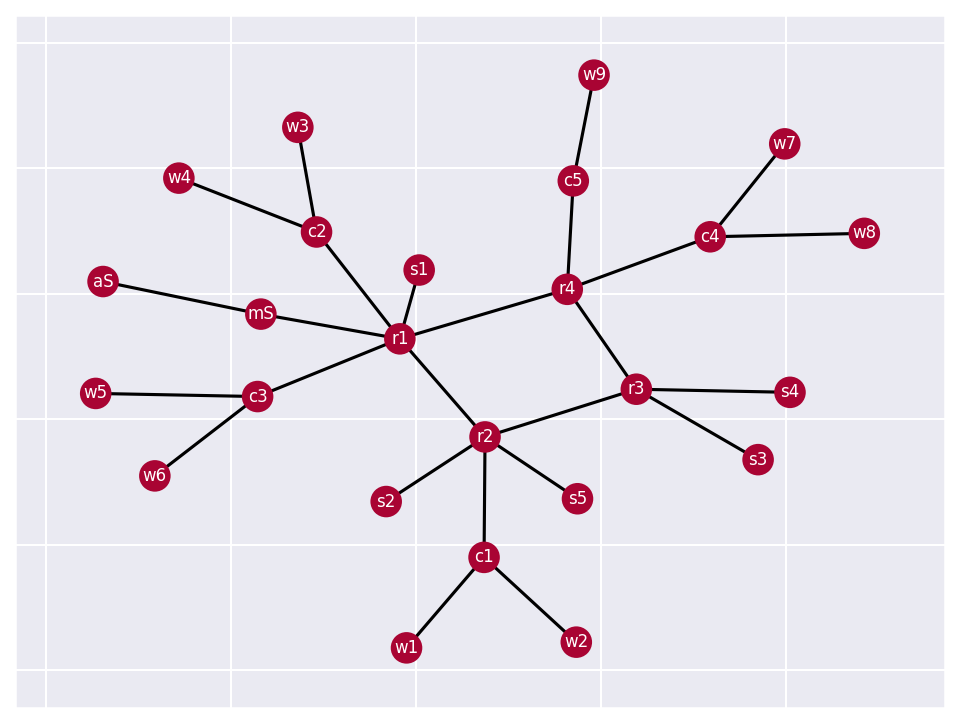

In [9]:
visualize_nerlnet_graph(API , API.json_dir_parser.json_from_path(conn_path)['connectionsMap'] , globe.components)

In [10]:
API.send_jsons_to_devices()

[INFO][2024-06-23 23:10:43,312] Sending distributed configurations to devices is completed


In [11]:
API.run_current_experiment_phase()
stats_train1 = API.get_experiment_flow(exp_name).generate_stats()

[INFO][2024-06-23 23:10:43,319] Experiment phase: training_phase1 of type training starts running...
[INFO][2024-06-23 23:10:43,320] Sending data to sources
[INFO][2024-06-23 23:10:45,810] Data is ready in sources
[INFO][2024-06-23 23:10:45,811] Phase training requested from Main Server
[INFO][2024-06-23 23:11:03,375] Processing experiment phase data
[INFO][2024-06-23 23:11:03,402] Processing experiment phase data completed
[INFO][2024-06-23 23:11:03,403] Start generating communication statistics for training_phase1 of type training
[INFO][2024-06-23 23:11:03,404] Statistics requested from Main Server
[INFO][2024-06-23 23:11:03,809] Statistics received from Main Server
[INFO][2024-06-23 23:11:03,810] Phase of training_phase1 training completed


In [12]:
API.next_experiment_phase()

True

In [13]:
API.run_current_experiment_phase()

[INFO][2024-06-23 23:11:03,831] Experiment phase: training_phase2 of type training starts running...
[INFO][2024-06-23 23:11:03,831] Sending data to sources
[INFO][2024-06-23 23:11:06,306] Data is ready in sources
[INFO][2024-06-23 23:11:06,307] Phase training requested from Main Server
[INFO][2024-06-23 23:11:21,704] Processing experiment phase data
[INFO][2024-06-23 23:11:21,863] Processing experiment phase data completed
[INFO][2024-06-23 23:11:21,865] Start generating communication statistics for training_phase2 of type training
[INFO][2024-06-23 23:11:21,867] Statistics requested from Main Server
[INFO][2024-06-23 23:11:22,121] Statistics received from Main Server
[INFO][2024-06-23 23:11:22,122] Phase of training_phase2 training completed


In [14]:
# API.get_experiment_flow(exp_name).get_csv_dataset().set_num_of_labels(0) # AEC Train (Change back when predicting)

In [15]:
stats_train2 = API.get_experiment_flow(exp_name).generate_stats()

In [16]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-06-23 23:11:22,152] Experiment phase: prediction_phase of type prediction starts running...
[INFO][2024-06-23 23:11:22,153] Sending data to sources
[INFO][2024-06-23 23:11:23,389] Data is ready in sources
[INFO][2024-06-23 23:11:23,390] Phase prediction requested from Main Server
[INFO][2024-06-23 23:11:28,222] Processing experiment phase data
[INFO][2024-06-23 23:11:28,240] Processing experiment phase data completed
[INFO][2024-06-23 23:11:28,242] Start generating communication statistics for prediction_phase of type prediction
[INFO][2024-06-23 23:11:28,243] Statistics requested from Main Server
[INFO][2024-06-23 23:11:28,497] Statistics received from Main Server
[INFO][2024-06-23 23:11:28,498] Phase of prediction_phase prediction completed


In [17]:
stats_pred = API.get_experiment_flow(exp_name).generate_stats()

Text(0.5, 1.0, 'Training Loss Function')

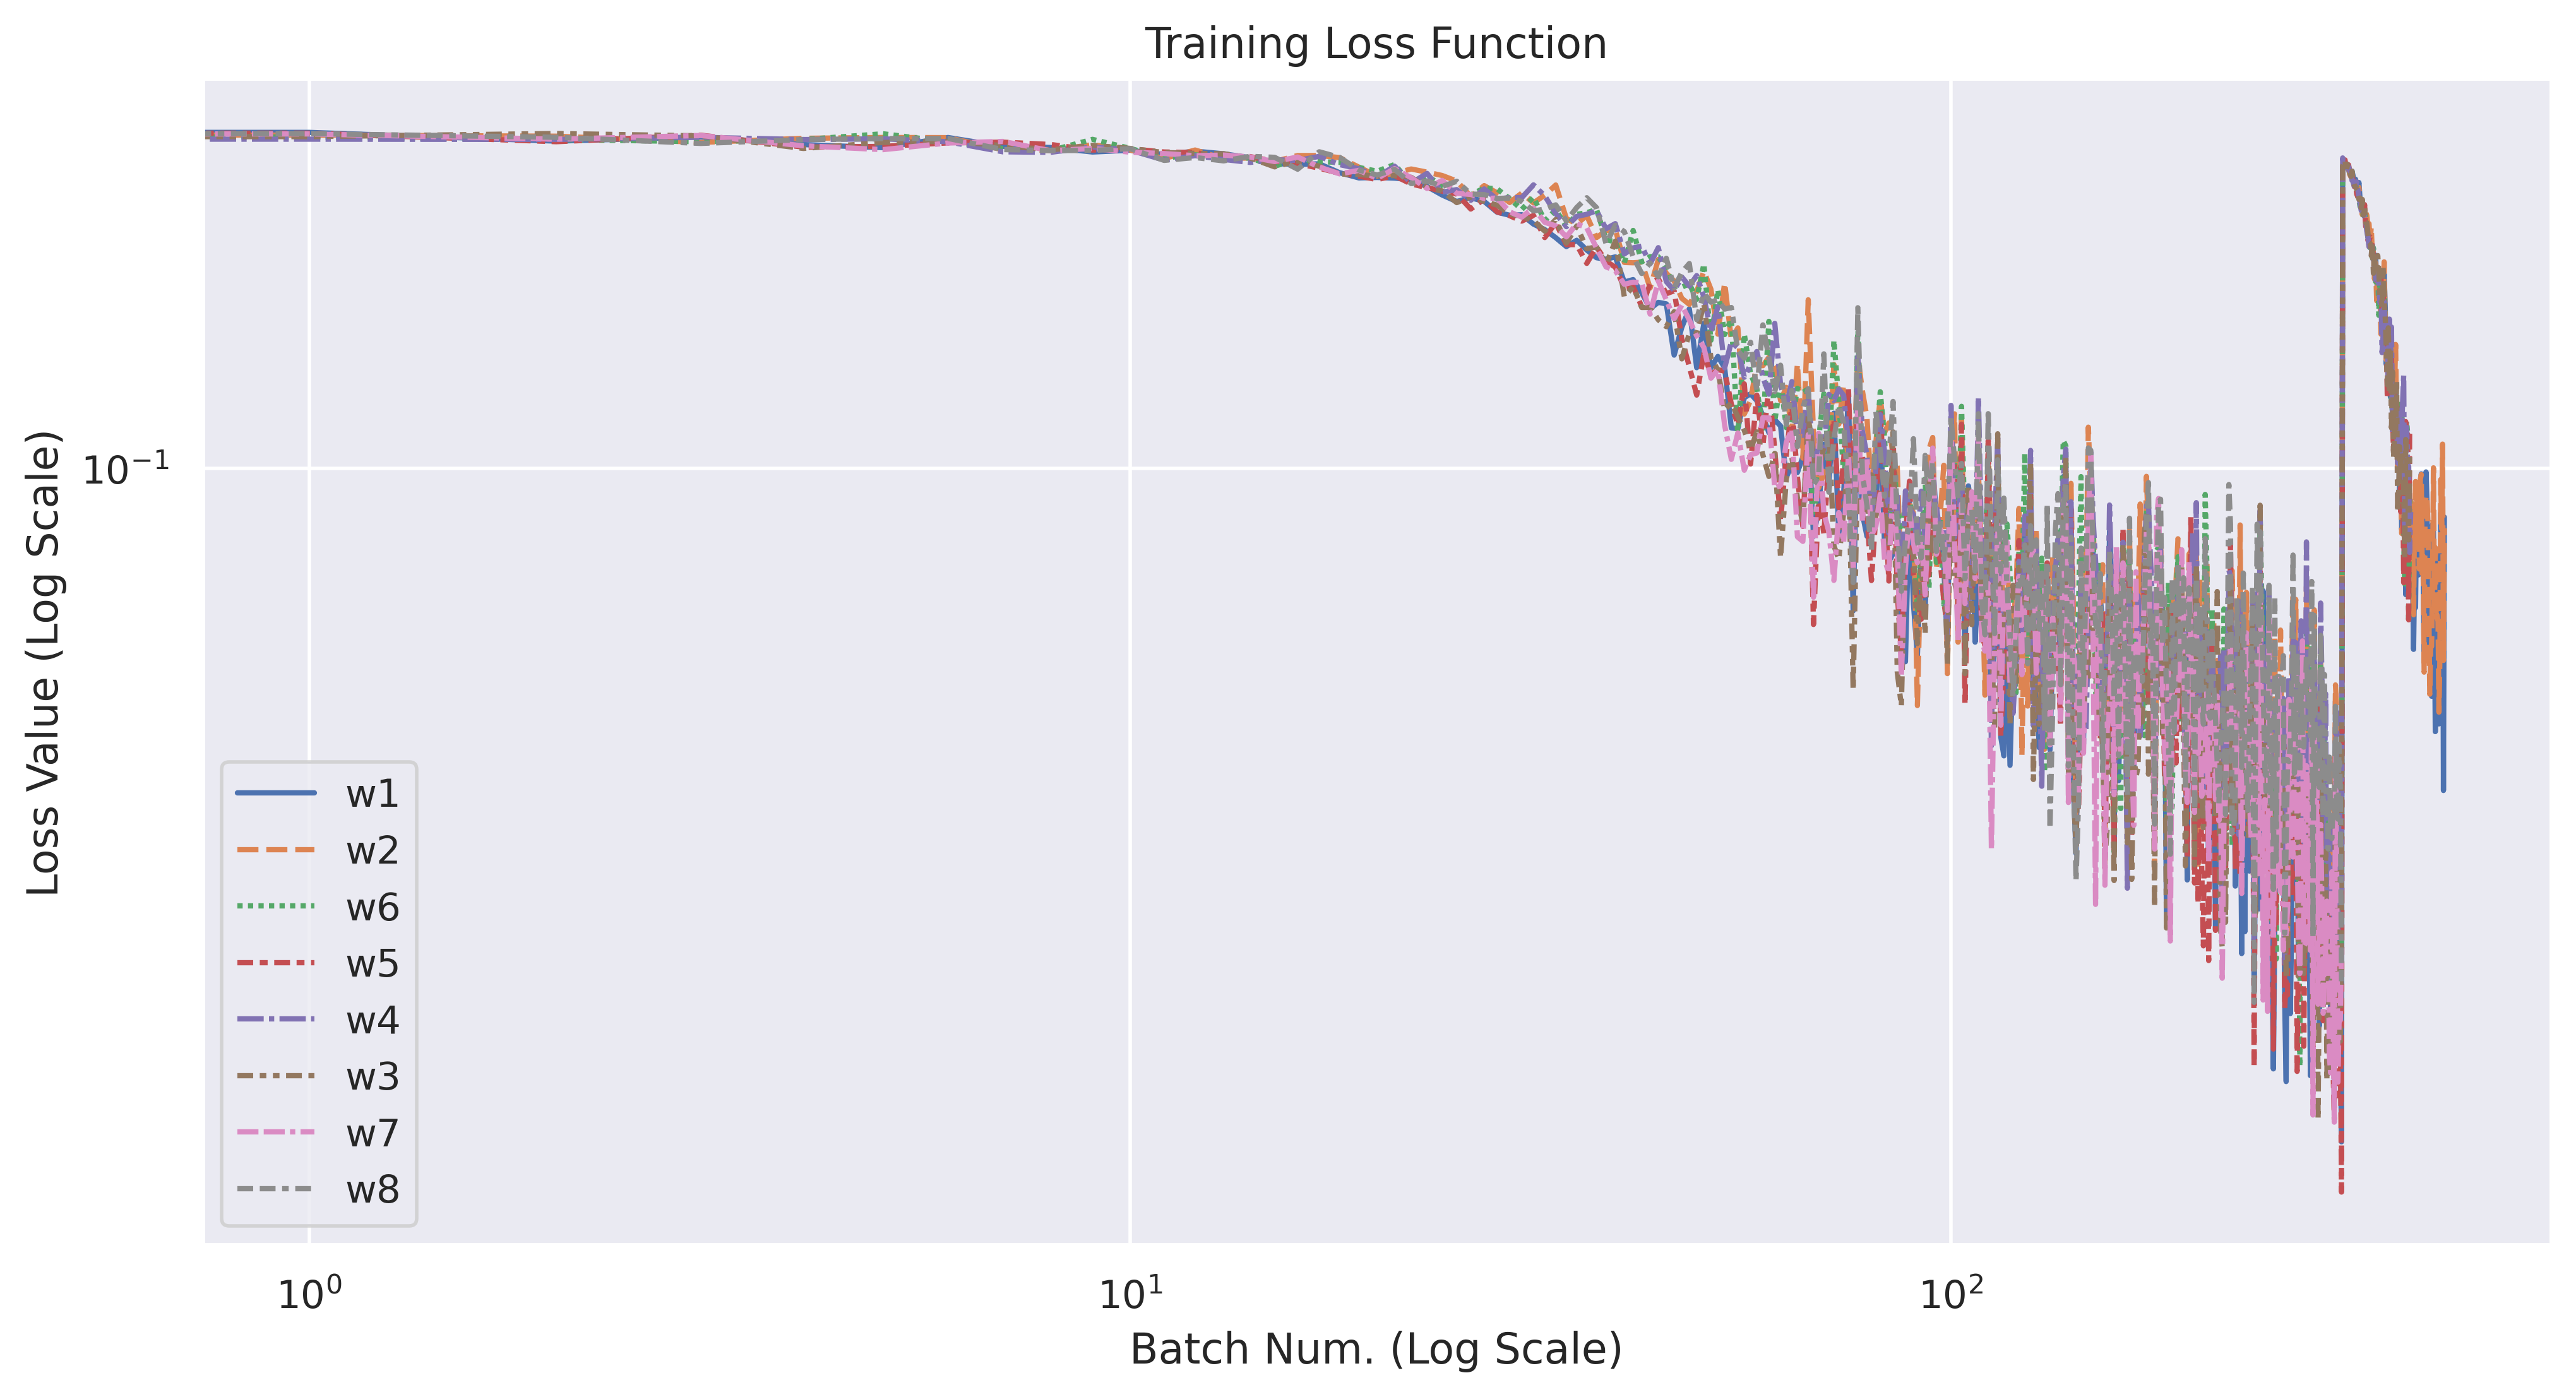

In [18]:
loss_train1 = stats_train1.get_loss_ts()
plt.figure(figsize=(12,6) , dpi=400)
plot = sns.lineplot(data=loss_train1)
plot.set(xscale="log" , yscale="log")
plt.xlabel('Batch Num. (Log Scale)')
plt.ylabel('Loss Value (Log Scale)')
plt.title('Training Loss Function')

Text(0.5, 1.0, 'Training2 Loss Function')

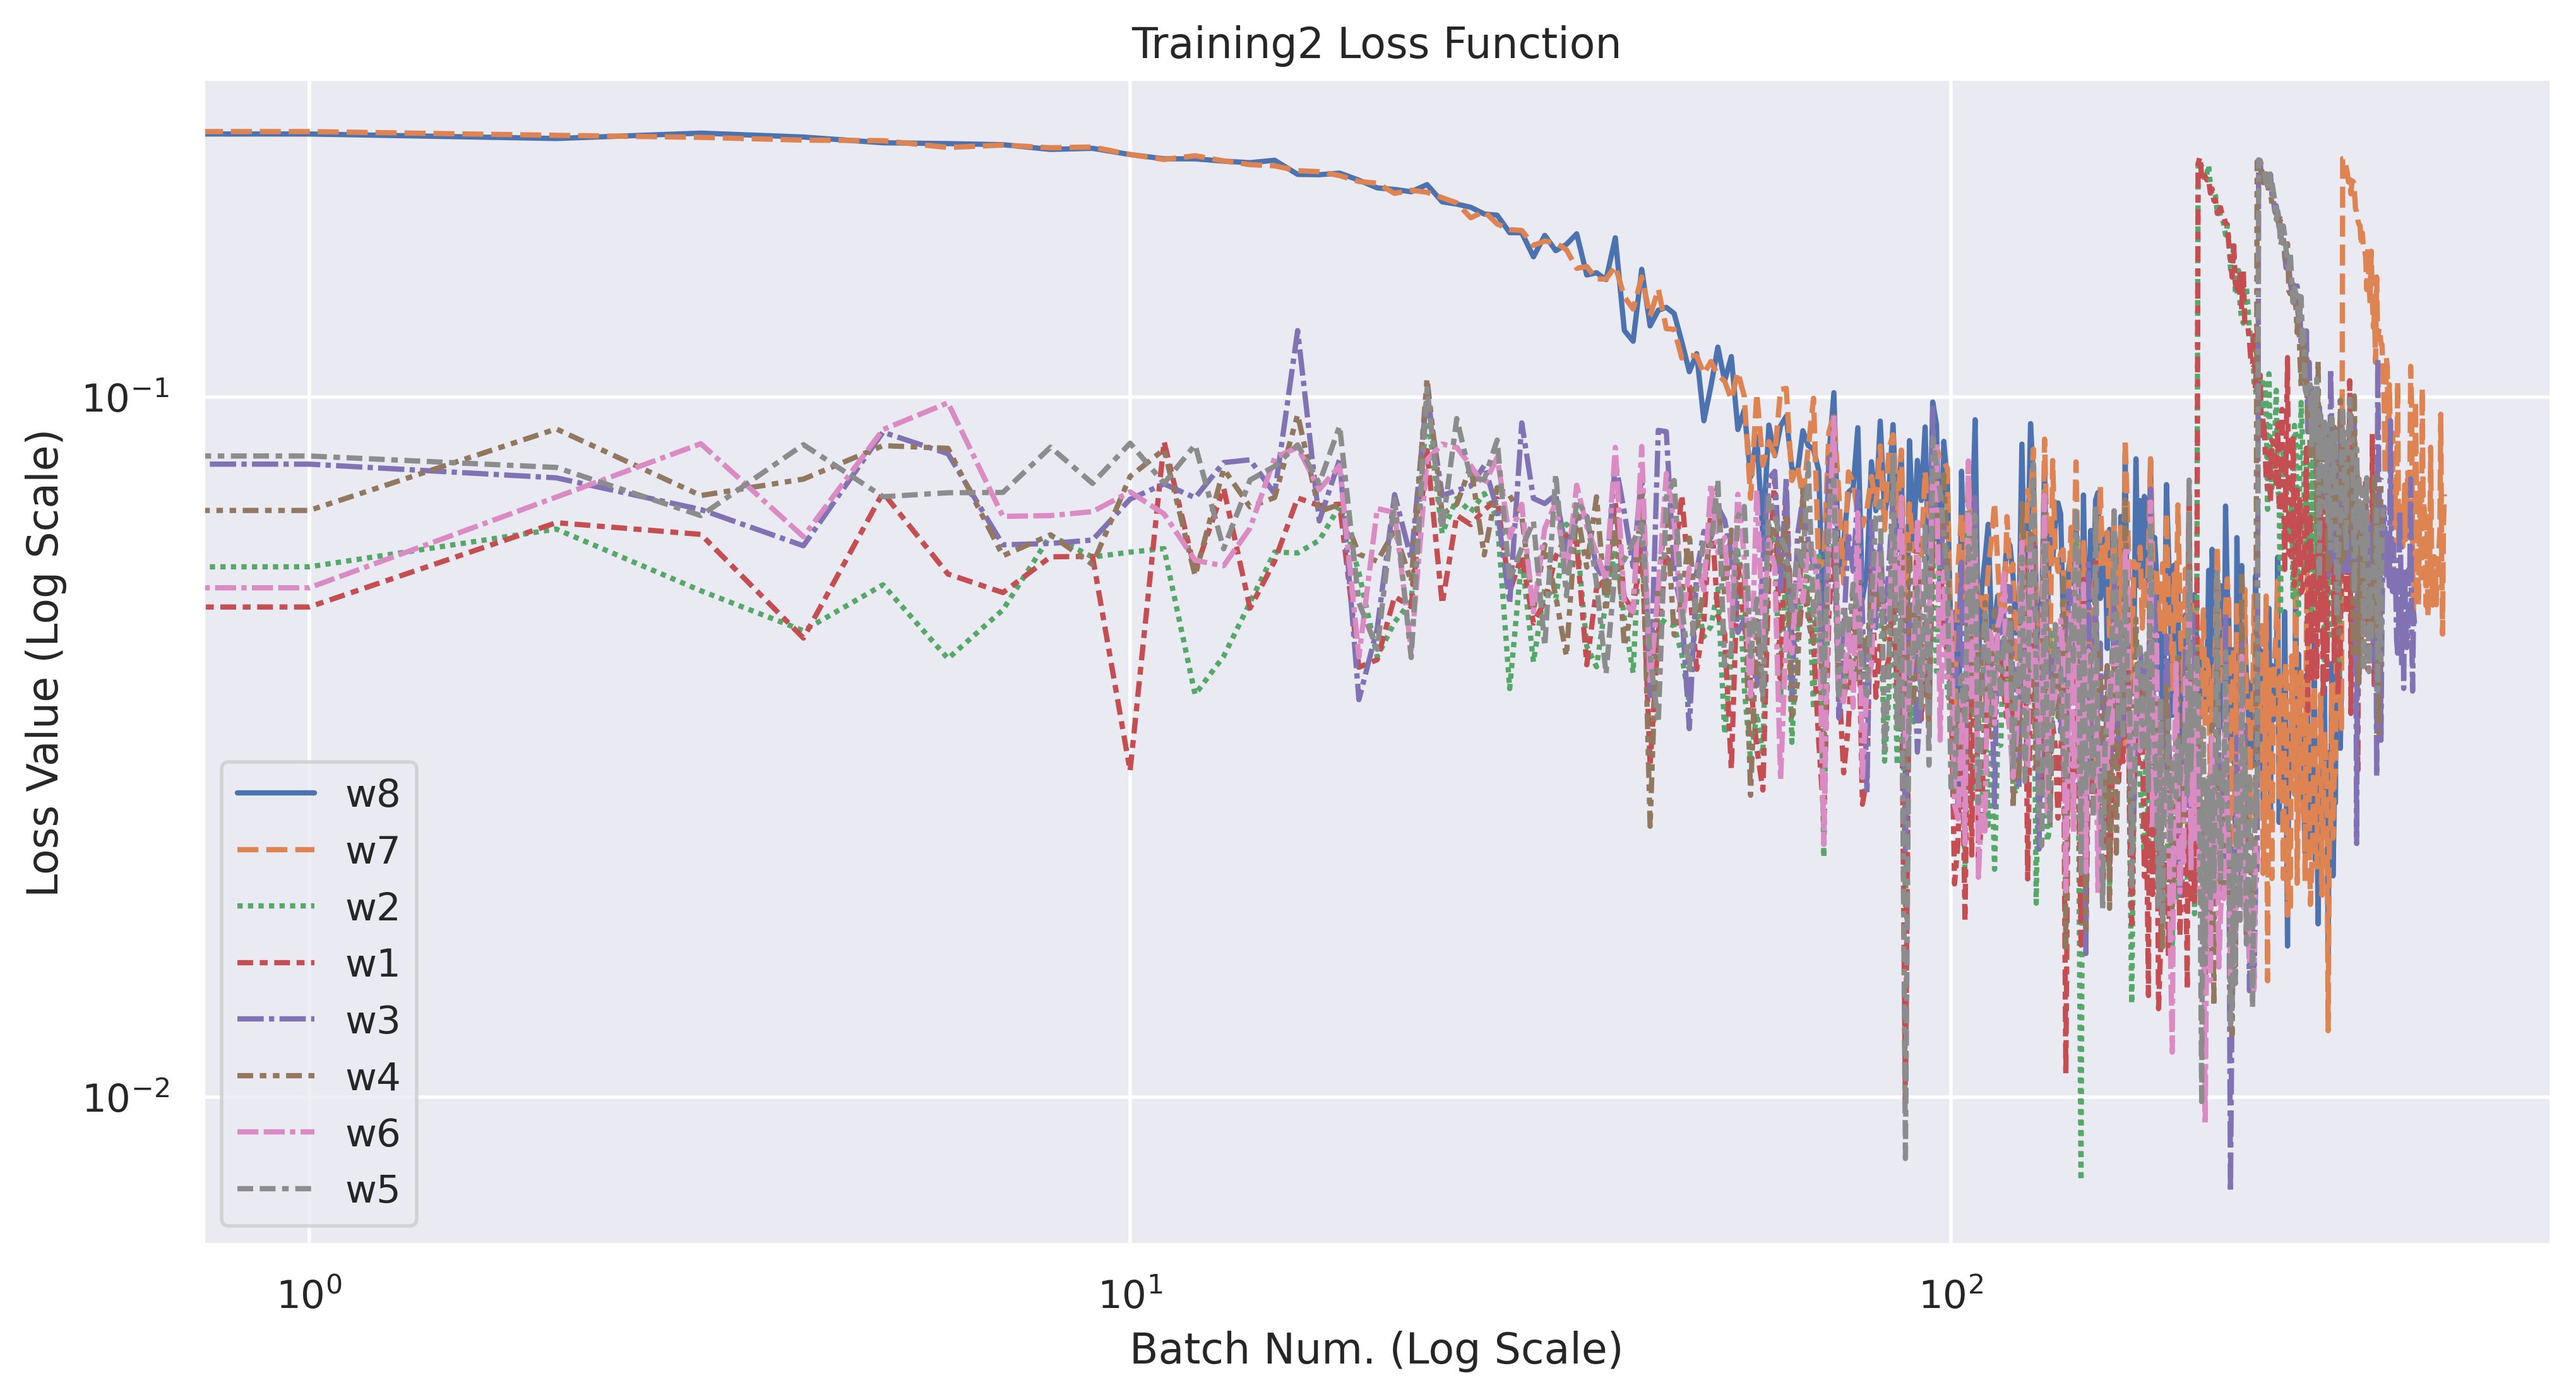

In [19]:
loss_train1 = stats_train2.get_loss_ts()
plt.figure(figsize=(12,6) , dpi=400)
plot = sns.lineplot(data=loss_train1)
plot.set(xscale="log" , yscale="log")
plt.xlabel('Batch Num. (Log Scale)')
plt.ylabel('Loss Value (Log Scale)')
plt.title('Training2 Loss Function')

Text(0.5, 1.0, 'Routers Received & Sent Messages')

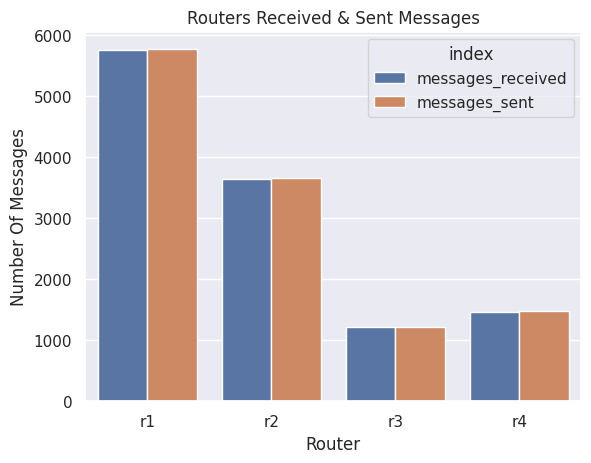

In [20]:
routers_comm_dict = stats_train1.get_communication_stats_routers()
df = pd.DataFrame.from_dict(routers_comm_dict)
df_selected = df.iloc[[0,1]]
data = pd.melt(df_selected.reset_index(), id_vars=['index'], value_vars=df.columns)
batches_stats = sns.barplot(x='variable', y='value', hue='index', data=data)
plt.ylabel('Number Of Messages')
plt.xlabel('Router')
plt.title("Routers Received & Sent Messages")

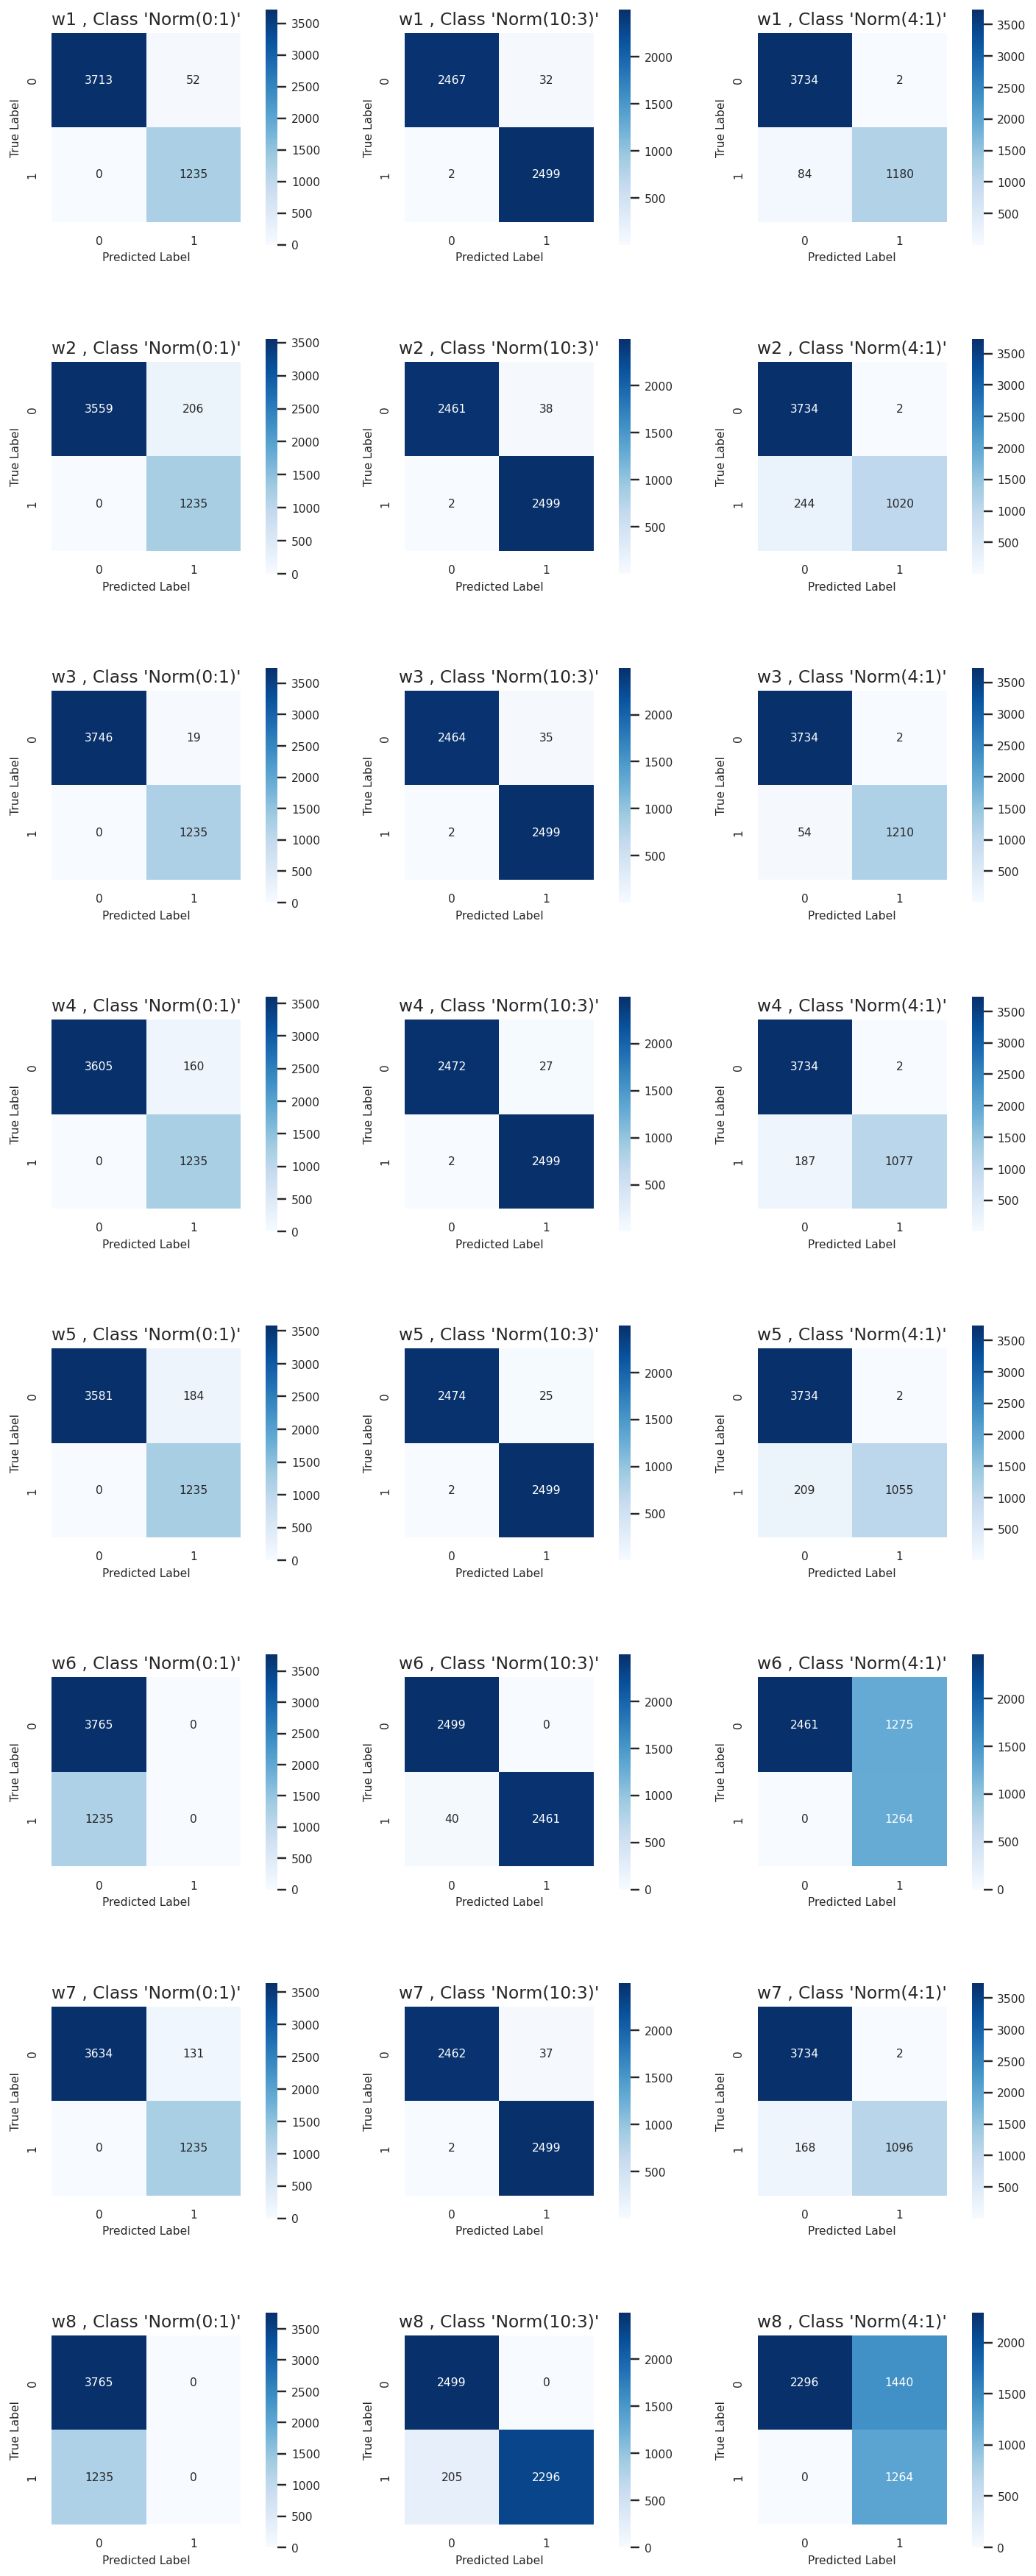

In [21]:
conf_mats_sources_workers , conf_mats_workers = stats_pred.get_confusion_matrices(plot=True)

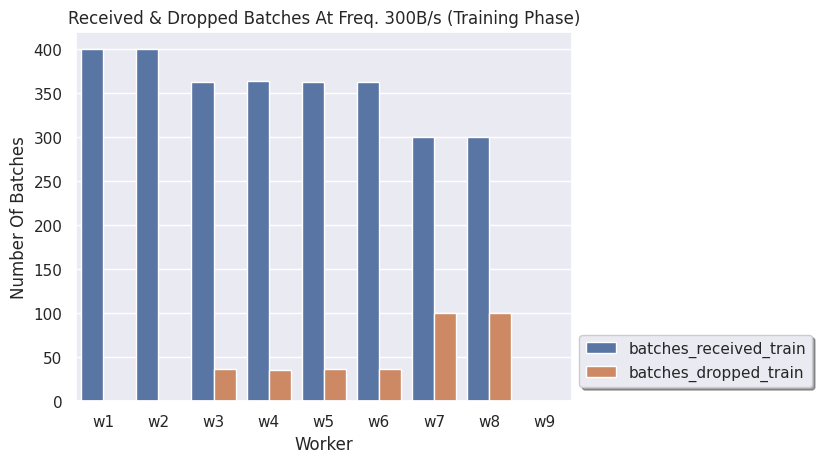

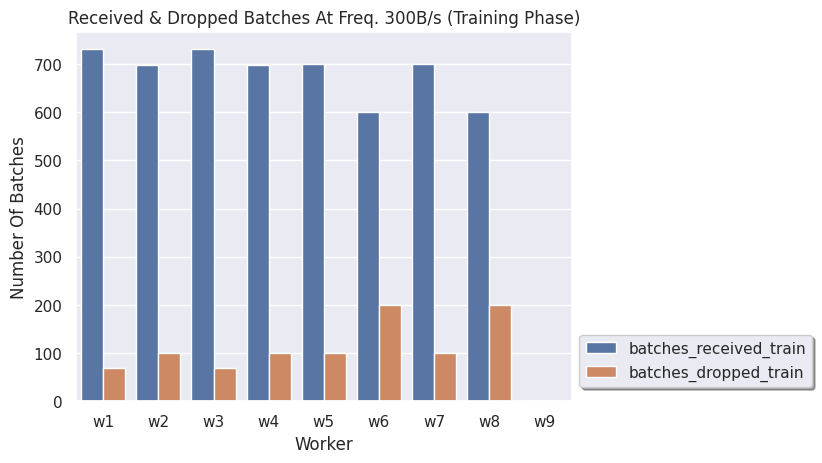

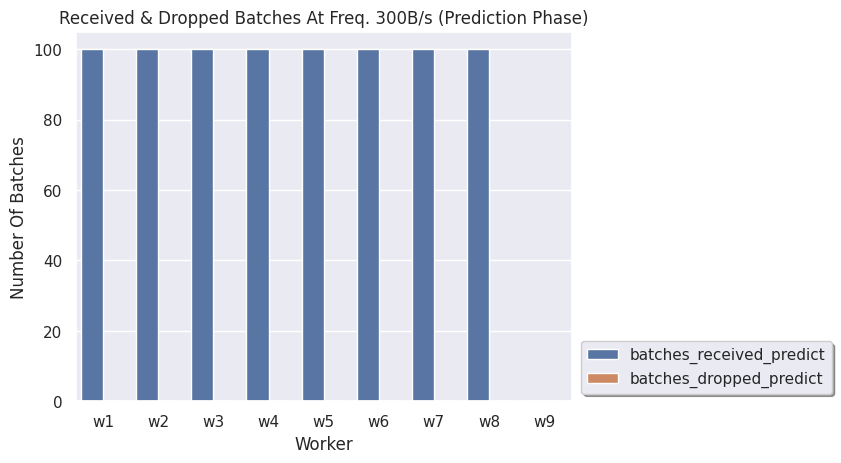

In [22]:
import pandas as pd
workers_comm_dict = stats_train1.get_communication_stats_workers()
df_train = pd.DataFrame.from_dict(workers_comm_dict)
plt.figure()
df_selected_train = df_train.iloc[[3,5]]
data_train = pd.melt(df_selected_train.reset_index(), id_vars=['index'], value_vars=df_train.columns)
batches_stats = sns.barplot(x='variable', y='value', hue='index', data=data_train)
plt.ylabel('Number Of Batches')
plt.xlabel('Worker')
plt.title("Received & Dropped Batches At Freq. 300B/s (Training Phase)")

batches_stats.legend(loc='upper right', bbox_to_anchor=(1.5, 0.2), shadow=True, ncol=1)
plt.show()

workers_comm_dict = stats_train2.get_communication_stats_workers()
df_train = pd.DataFrame.from_dict(workers_comm_dict)
plt.figure()
df_selected_train = df_train.iloc[[3,5]]
data_train = pd.melt(df_selected_train.reset_index(), id_vars=['index'], value_vars=df_train.columns)
batches_stats = sns.barplot(x='variable', y='value', hue='index', data=data_train)
plt.ylabel('Number Of Batches')
plt.xlabel('Worker')
plt.title("Received & Dropped Batches At Freq. 300B/s (Training Phase)")

batches_stats.legend(loc='upper right', bbox_to_anchor=(1.5, 0.2), shadow=True, ncol=1)
plt.show()

workers_comm_dict_pred = stats_pred.get_communication_stats_workers()
df_pred = pd.DataFrame.from_dict(workers_comm_dict_pred)

plt.figure()
df_selected_pred = df_pred.iloc[[4,6]]
data_pred = pd.melt(df_selected_pred.reset_index(), id_vars=['index'], value_vars=df_pred.columns)
batches_stats_pred = sns.barplot(x='variable', y='value', hue='index', data=data_pred)
plt.ylabel('Number Of Batches')
plt.xlabel('Worker')
plt.title("Received & Dropped Batches At Freq. 300B/s (Prediction Phase)")
batches_stats_pred.legend(loc='lower right', bbox_to_anchor=(1.54, 0), shadow=True, ncol=1)
plt.show()

In [23]:
model_perf = stats_pred.get_model_performence_stats(conf_mats_workers, show=True)

,Worker,Class,TN,FP,FN,TP,Accuracy,Balanced Accuracy,Precision,Recall,True Negative Rate,Informedness,F1
0,w8,Norm(0:1),3765,0,1235,0,0.753000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000
1,w8,Norm(4:1),2296,1440,0,1264,0.712000,0.807281,0.467456,1.000000,0.614561,0.614561,0.637097
2,w8,Norm(10:3),2499,0,205,2296,0.959000,0.959016,1.000000,0.918033,1.000000,0.918033,0.957265
3,w1,Norm(0:1),3713,52,0,1235,0.989600,0.993094,0.959596,1.000000,0.986189,0.986189,0.979381
4,w1,Norm(4:1),3734,2,84,1180,0.982800,0.966504,0.998308,0.933544,0.999465,0.933009,0.964841
5,w1,Norm(10:3),2467,32,2,2499,0.993200,0.993198,0.987357,0.999200,0.987195,0.986395,0.993243
6,w7,Norm(0:1),3634,131,0,1235,0.973800,0.982603,0.904100,1.000000,0.965206,0.965206,0.949635
7,w7,Norm(4:1),3734,2,168,1096,0.966000,0.933277,0.998179,0.867089,0.999465,0.866553,0.928027
8,w7,Norm(10:3),2462,37,2,2499,0.992200,0.992197,0.985410,0.999200,0.985194,0.984394,0.992257
9,w2,Norm(0:1),3559,206,0,1235,0.958800,0.972643,0.857044,1.000000,0.945286,0.945286,0.923019


<Axes: xlabel='Worker', ylabel='F1'>

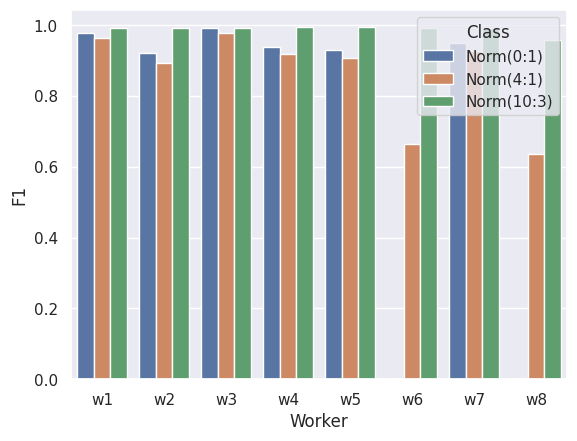

In [24]:
sns.barplot(data=model_perf.sort_values('Worker') , x='Worker' , y='F1',hue='Class')